Dataset Head:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigree  Age  Outcome  
0             0.627   50        1  
1             0.351   31        0  
2             0.672   32        1  
3             0.167   21        0  
4             2.288   33        1  

Missing Values (0s represent missing data in this dataset):
Pregnancies         111
Glucose               5
BloodPressure        35
SkinThickness       227
Insulin             374
BMI                  11
DiabetesPedigree      0
Age                   0
Outcome             500
dtype: int64

Random Forest Performance:
Accuracy: 0.76
ROC-

<Figure size 1000x600 with 0 Axes>

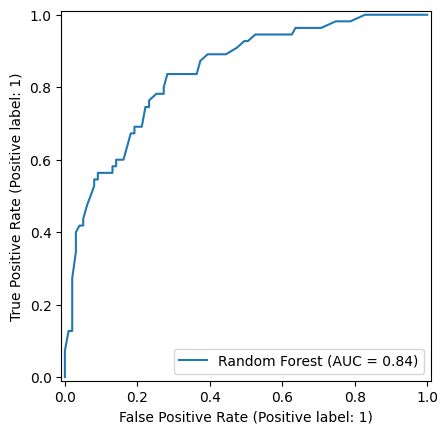

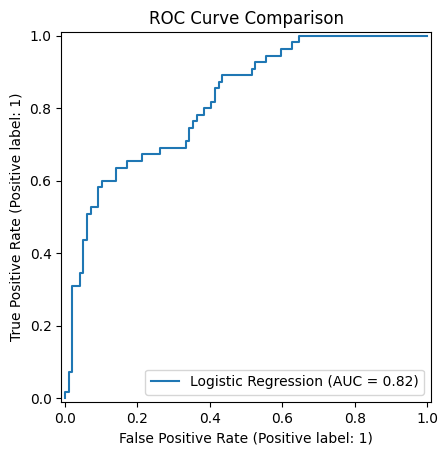

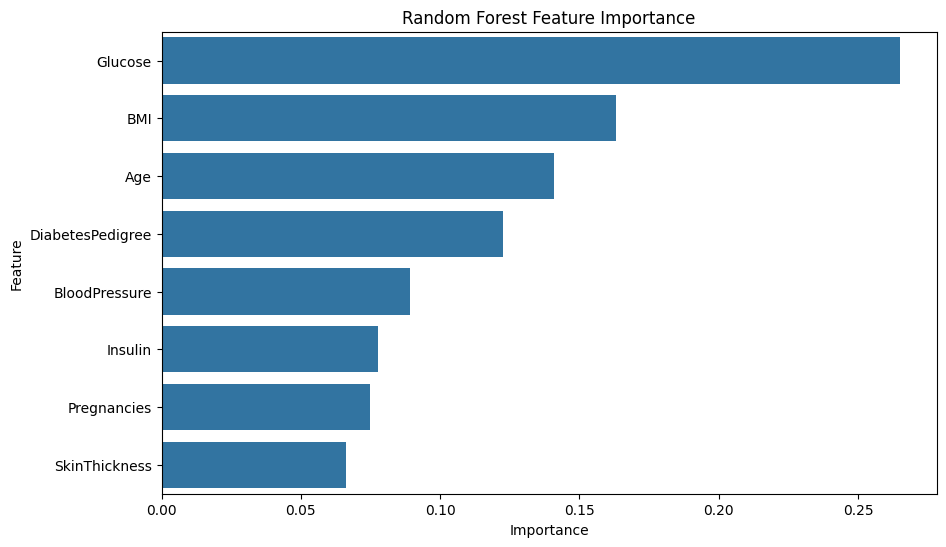

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay
)

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigree", "Age", "Outcome"]
data = pd.read_csv(url, names=columns)

# Display dataset info
print("Dataset Head:")
print(data.head())
print("\nMissing Values (0s represent missing data in this dataset):")
print(data.replace(0, np.nan).isnull().sum())

# Replace 0s with median (except Pregnancies & Outcome)
for col in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]:
    data[col] = data[col].replace(0, data[col].median())

# Split features (X) and target (y)
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Standardize features (important for Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)

# Train models
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Predictions
rf_y_pred = rf_model.predict(X_test)
lr_y_pred = lr_model.predict(X_test)

# Probabilities for ROC-AUC
rf_y_prob = rf_model.predict_proba(X_test)[:, 1]
lr_y_prob = lr_model.predict_proba(X_test)[:, 1]

# Evaluate Random Forest
print("\nRandom Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, rf_y_pred):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, rf_y_prob):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_y_pred))

# Evaluate Logistic Regression
print("\nLogistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, lr_y_pred):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, lr_y_prob):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, lr_y_pred))

# Plot ROC Curve
plt.figure(figsize=(10, 6))
RocCurveDisplay.from_estimator(rf_model, X_test, y_test, name="Random Forest")
RocCurveDisplay.from_estimator(lr_model, X_test, y_test, name="Logistic Regression")
plt.title("ROC Curve Comparison")
plt.show()

# Feature Importance (Random Forest)
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values("Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title("Random Forest Feature Importance")
plt.show()